In [ ]:
# Mount Google Drive and load the data
from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from google.colab import files
file=files.upload()

Saving final hate speech datasett.csv to final hate speech datasett (1).csv


In [ ]:
# Example: Loading a .txt file from Google Drive
file_path = '/content/drive/MyDrive/final hate speech datasett.csv'

# Reading the file contents
with open(file_path, 'r', encoding='latin-1') as file:
    content = file.readlines()

# Displaying the content
for line in content:
    print(line)


tweet_id,text,label,language,target

tweet_No_001,uwizi rt  kenyan rao akishinda nitachinja kuku cnn kenyans are planning to kill luhyas should raila win,hate,eng-swa,ethnicity

tweet_No_002,wakikuyu ndio wako na manyumba za kukodeshwa tutaona nyasi no nani,hate,swa,ethnicity

tweet_No_003,wakikuyu ni wezi power hungry and this time we have refused kama ni mbaya we are seceding,hate,eng-swa,ethnicity

tweet_No_004,wakikuyu sijui shida yenu ni nini kuogopa railskwani aliwafanyia ninimlikuwa wajinga politically akawachanuahii kenya si yenu,hate,swa,ethnicity

tweet_No_005,wakikuyu waache kutubeba kama watoto hawa ni wafanya biashara gani kama si biashara ya haramu,hate,swa,ethnicity

tweet_No_006,wakikuyu walisogwa hwakuumbwa ,hate,swa,ethnicity

tweet_No_007,wakikuyu wamehold hii country at ransom for long huku mathare wameshaua watu wawili saa hii,hate,eng-swa,ethnicity

tweet_No_008,wakikuyu wamesema tunakula nini for lunch naskia wao ndio kusema hii country,hate,eng-swa,ethnicity

tw

In [ ]:
import pandas as pd
data=pd.read_csv('/content/drive/MyDrive/final hate speech datasett.csv', encoding='latin-1')

In [ ]:
import os
import requests
import zipfile
import gzip
import shutil
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Define the path on Google Drive where the files will be saved
google_drive_path = '/content/drive/MyDrive/embedding/'

# Create a folder if it does not exist
if not os.path.exists(google_drive_path):
    os.makedirs(google_drive_path)

def download_glove_vectors():
    """Download the GloVe vectors and extract them."""
    glove_urls = {
        '6B': 'https://nlp.stanford.edu/data/glove.6B.zip',  # Updated URL
        '50': 'https://nlp.stanford.edu/data/glove.6B.50d.zip',  # Updated URL
        '100': 'https://nlp.stanford.edu/data/glove.6B.100d.zip',  # Updated URL
        '200': 'https://nlp.stanford.edu/data/glove.6B.200d.zip',  # Updated URL
        '300': 'https://nlp.stanford.edu/data/glove.6B.300d.zip'  # Updated URL
    }

    for key, url in glove_urls.items():
        print(f"Downloading GloVe {key} vectors...")
        response = requests.get(url, stream=True) # Download in chunks to handle large files
        zip_file_path = os.path.join(google_drive_path, f'glove.{key}.zip')

        # Using 'with' to ensure proper file closure
        with open(zip_file_path, 'wb') as file:
            for chunk in response.iter_content(chunk_size=8192): # Write in chunks to prevent memory overload
                if chunk:
                    file.write(chunk)
        print(f"Downloaded {zip_file_path}")

        # Check if the file is a valid zip file before attempting to extract
        try:
            with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
                # Extract to the same folder where the zip file is located
                zip_ref.extractall(google_drive_path)
            # After extraction, remove the zip file
            os.remove(zip_file_path)
            print(f"Extracted {zip_file_path}")
        except zipfile.BadZipFile:
            print(f"Error: {zip_file_path} is not a valid zip file. Download might be corrupted or the URL is incorrect.")
            # Optionally, you can remove the corrupted file:
            os.remove(zip_file_path)

def extract_zip(zip_file_path):
    """Extract a zip file."""
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        # Extract to the same folder where the zip file is located
        zip_ref.extractall(google_drive_path)
    # After extraction, remove the zip file
    os.remove(zip_file_path)

# ... (Rest of the code remains the same)

def main():
    # Download and extract GloVe vectors
    download_glove_vectors()

    # Download and extract FastText vectors
    download_fasttext_vectors() # Assuming download_fasttext_vectors is defined elsewhere

if __name__ == '__main__':
    main()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


KeyboardInterrupt: 

In [ ]:
import pandas as pd
data=pd.read_csv('/content/drive/MyDrive/final hate speech datasett.csv', encoding='latin-1')

In [ ]:
# Uninstall existing numpy version
!pip uninstall -y numpy

# Install a stable compatible version of numpy (e.g., 1.23.5)
!pip uninstall numpy -y  # Uninstall numpy
!pip install numpy==1.26.4

# Reinstall sklearn and gensim to ensure compatibility
!pip install --upgrade scikit-learn
!pip install --upgrade gensim

# Reinstall or upgrade scikit-learn, gensim, tensorflow, and numba
!pip install --upgrade scikit-learn gensim tensorflow numba

# Reinstall or update other packages that are relevant

!pip uninstall tensorflow -y  # Uninstall tensorflow
!pip install tensorflow==2.18.0  # Reinstall a compatible version of tensorflow
!pip install --upgrade numba

Found existing installation: numpy 2.1.3
Uninstalling numpy-2.1.3:
  Successfully uninstalled numpy-2.1.3
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 96.5 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
dask-cuda 25.2.0 requires numba<0.61.0a0,>=0.59.1, but you have numba 0.61.0 which is incompatible.
cudf-cu12 25.2.1 requires numba<0.61.0a0,>=0.59.1, but you have numba 0.61.0 which is incompatible.
distributed-ucxx-cu12 0.42.0 requires numba<0.61.0a0,>=0.59.1, but you have numba 0.61.0 which is incompatible.
tensorflow-text 2.18.1 requires tensorflow<2.19,>=2.18.0, but you have tensorflow 2.19.0 which is incompatible.
tf-keras 2.18.0 requires tensorflow<2.19,>=2.18, but you have tensorflow 2.19.0 which is incompatible.
cuml-cu12 25.2.1 requires numba<0

In [ ]:
# Encode labels
from sklearn.preprocessing import LabelEncoder
!pip install gensim
# Assuming `data` is your DataFrame
label_encoder = LabelEncoder()
data['encoded_target'] = label_encoder.fit_transform(data['label'])

# Split the data into features and target
X = data['text']
y = data['encoded_target']

# Train, Test, Validation Split (60% train, 20% test, 20% validation)
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print(f"Train: {len(X_train)}, Validation: {len(X_val)}, Test: {len(X_test)}")

# Load GloVe and FastText embeddings
import numpy as np
from gensim.models import FastText

# Load GloVe embeddings
def load_glove_embeddings(file_path):
    embeddings = {}
    with open(file_path, 'r', encoding='utf-8') as f:
        for line in f:
            values = line.split()
            word = values[0]
            vector = np.asarray(values[1:], dtype='float32')
            embeddings[word] = vector
    return embeddings

# Specify the correct path to your GloVe and FastText embeddings
glove_embeddings = load_glove_embeddings('/content/drive/MyDrive/embedding/glove.6B.50d.txt')

# Load FastText embeddings
fasttext_model = FastText.load_fasttext_format('/content/drive/MyDrive/embedding/fasttext_en_vectors.bin')

# Ensure `X_test` is a string type
X_test = X_test.astype(str)

Train: 11622, Validation: 3874, Test: 3874


<ipython-input-3-14ff4957bc89>:39: DeprecationWarning: Call to deprecated `load_fasttext_format` (use load_facebook_vectors (to use pretrained embeddings) or load_facebook_model (to continue training with the loaded full model, more RAM) instead).
  fasttext_model = FastText.load_fasttext_format('/content/drive/MyDrive/embedding/fasttext_en_vectors.bin')


In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

# Ensure that the text data is in a consistent format (strings)
X_train = X_train.astype(str)
X_val = X_val.astype(str)
X_test = X_test.astype(str)

# Tokenize the text data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

# Convert text to sequences
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_val_seq = tokenizer.texts_to_sequences(X_val)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Find the maximum sequence length based on training data
max_sequence_length = max([len(sequence) for sequence in X_train_seq])

# Pad the sequences to ensure uniform length across all samples
X_train_pad = pad_sequences(X_train_seq, maxlen=max_sequence_length, padding='post', dtype='int32')
X_val_pad = pad_sequences(X_val_seq, maxlen=max_sequence_length, padding='post', dtype='int32')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_sequence_length, padding='post', dtype='int32')

# Check the shape of the padded sequences
print(f"Training Data Shape: {X_train_pad.shape}")
print(f"Validation Data Shape: {X_val_pad.shape}")
print(f"Test Data Shape: {X_test_pad.shape}")

Training Data Shape: (11622, 83)
Validation Data Shape: (3874, 83)
Test Data Shape: (3874, 83)


In [ ]:
!pip install scikit-learn
import numpy as np
from sklearn.decomposition import PCA
# GloVe embedding matrix
embedding_dim_glove = 50
embedding_matrix_glove = np.zeros((len(tokenizer.word_index) + 1, embedding_dim_glove))
for word, i in tokenizer.word_index.items():
    if word in glove_embeddings:
        embedding_matrix_glove[i] = glove_embeddings[word]

# FastText embedding matrix
embedding_dim_fasttext = 300
embedding_matrix_fasttext = np.zeros((len(tokenizer.word_index) + 1, embedding_dim_fasttext))
for word, i in tokenizer.word_index.items():
    if word in fasttext_model.wv:
        embedding_matrix_fasttext[i] = fasttext_model.wv[word]

# Reduce FastText embedding dimensions to match GloVe
pca = PCA(n_components=embedding_dim_glove) # Reduce to 50 dimensions
embedding_matrix_fasttext_reduced = pca.fit_transform(embedding_matrix_fasttext)


# Combined embeddings (GloVe + FastText)
#embedding_matrix_combined = (embedding_matrix_glove + embedding_matrix_fasttext) / 2
embedding_matrix_combined = (embedding_matrix_glove + embedding_matrix_fasttext_reduced) / 2





In [ ]:
# BiLSTM model definition
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

def create_bilstm_model(embedding_matrix, embedding_dim):
    model = Sequential()
    model.add(Embedding(input_dim=len(tokenizer.word_index) + 1,
                        output_dim=embedding_dim,
                        weights=[embedding_matrix],
                        input_length=max_sequence_length,
                        trainable=False))
    model.add(Bidirectional(LSTM(64, dropout=0.2, recurrent_dropout=0.2)))
    model.add(Dense(3, activation='softmax'))  # Multi-class classification

    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    return model


In [ ]:

# Early stopping setup
early_stopping = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

# Function to plot confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

def plot_confusion_matrix(cm, labels):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

In [ ]:
# BiLSTM with FastText
bilstm_fasttext_model = create_bilstm_model(embedding_matrix_fasttext, embedding_dim_fasttext)
history_fasttext = bilstm_fasttext_model.fit(X_train_pad, y_train, epochs=20, batch_size=64, validation_data=(X_val_pad, y_val), callbacks=[early_stopping])

# Evaluate the model
y_pred_fasttext = bilstm_fasttext_model.predict(X_test_pad)
y_pred_fasttext_class = np.argmax(y_pred_fasttext, axis=1)



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/20
182/182 ━━━━━━━━━━━━━━━━━━━━ 61s 287ms/step - accuracy: 0.5534 - loss: 0.9348 - val_accuracy: 0.7161 - val_loss: 0.6707
Epoch 2/20
182/182 ━━━━━━━━━━━━━━━━━━━━ 52s 283ms/step - accuracy: 0.7174 - loss: 0.6815 - val_accuracy: 0.7563 - val_loss: 0.5903
Epoch 3/20
182/182 ━━━━━━━━━━━━━━━━━━━━ 51s 279ms/step - accuracy: 0.7440 - loss: 0.6255 - val_accuracy: 0.7847 - val_loss: 0.5448
Epoch 4/20
182/182 ━━━━━━━━━━━━━━━━━━━━ 51s 278ms/step - accuracy: 0.7786 - loss: 0.5602 - val_accuracy: 0.7961 - val_loss: 0.5179
Epoch 5/20
182/182 ━━━━━━━━━━━━━━━━━━━━ 51s 280ms/step - accuracy: 0.7836 - loss: 0.5460 - val_accuracy: 0.8160 - val_loss: 0.4751
Epoch 6/20
182/182 ━━━━━━━━━━━━━━━━━━━━ 51s 281ms/step - accuracy: 0.8021 - loss: 0.5068 - val_accuracy: 0.8209 - val_loss: 0.4585
Epoch 7/20
182/182 ━━━━━━━━━━━━━━━━━━━━ 51s 281ms/step - accuracy: 0.8223 - loss: 0.4771 - val_accuracy: 0.8402 - val_loss: 0.4323
Epoch 8/20
182/182 ━━━━━━━━━━━━━━━━━━━━ 51s 278ms/step - accuracy: 0.8385 - loss: 0

BiLSTM + FastText Classification Report
              precision    recall  f1-score   support

        hate       0.89      0.75      0.81       679
     neither       0.85      0.91      0.88      1648
   offensive       0.89      0.89      0.89      1547

    accuracy                           0.87      3874
   macro avg       0.88      0.85      0.86      3874
weighted avg       0.87      0.87      0.87      3874



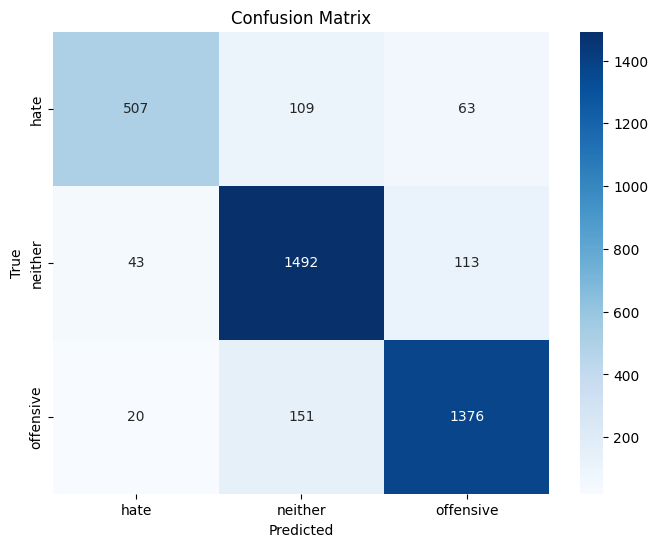

In [ ]:
# Classification report and confusion matrix
print("BiLSTM + FastText Classification Report")
print(classification_report(y_test, y_pred_fasttext_class, target_names=label_encoder.classes_))

cm = confusion_matrix(y_test, y_pred_fasttext_class)
plot_confusion_matrix(cm, label_encoder.classes_)

# 5-Fold Cross-Validation
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

# 5-fold cross-validation setup
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Collect metrics for each fold
f1_scores = []
accuracies = []
precisions = []
recalls = []



In [ ]:
for train_index, val_index in kf.split(X_train_pad, y_train):
    X_train_fold, X_val_fold = X_train_pad[train_index], X_train_pad[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]
    #y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

    # Train BiLSTM with FastText on each fold
    model = create_bilstm_model(embedding_matrix_fasttext, embedding_dim_fasttext)
    model.fit(X_train_fold, y_train_fold, epochs=10, batch_size=64, validation_data=(X_val_fold, y_val_fold), callbacks=[early_stopping], verbose=0)

    # Predict on validation set
    y_pred_fold = model.predict(X_val_fold)
    y_pred_fold_class = np.argmax(y_pred_fold, axis=1)



In [ ]:
# BiLSTM with GloVe
embedding_dim_glove = 50  # Make sure this matches your GloVe embedding dimension
bilstm_glove_model = create_bilstm_model(embedding_matrix_glove, embedding_dim_glove)
history_glove = bilstm_glove_model.fit(X_train_pad, y_train, epochs=20, batch_size=64,
                                       validation_data=(X_val_pad, y_val), callbacks=[early_stopping])

# Evaluate the model
y_pred_glove = bilstm_glove_model.predict(X_test_pad)
y_pred_glove_class = np.argmax(y_pred_glove, axis=1)

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


182/182 ━━━━━━━━━━━━━━━━━━━━ 57s 276ms/step - accuracy: 0.5261 - loss: 0.9353 - val_accuracy: 0.6820 - val_loss: 0.7224
Epoch 2/20
182/182 ━━━━━━━━━━━━━━━━━━━━ 50s 272ms/step - accuracy: 0.6607 - loss: 0.7588 - val_accuracy: 0.6970 - val_loss: 0.6811
Epoch 3/20
182/182 ━━━━━━━━━━━━━━━━━━━━ 49s 271ms/step - accuracy: 0.6890 - loss: 0.7010 - val_accuracy: 0.7161 - val_loss: 0.6538
Epoch 4/20
182/182 ━━━━━━━━━━━━━━━━━━━━ 50s 273ms/step - accuracy: 0.6947 - loss: 0.6833 - val_accuracy: 0.7184 - val_loss: 0.6367
Epoch 5/20
182/182 ━━━━━━━━━━━━━━━━━━━━ 50s 273ms/step - accuracy: 0.7075 - loss: 0.6531 - val_accuracy: 0.7241 - val_loss: 0.6294
Epoch 6/20
182/182 ━━━━━━━━━━━━━━━━━━━━ 49s 271ms/step - accuracy: 0.7295 - loss: 0.6322 - val_accuracy: 0.7310 - val_loss: 0.6185
Epoch 7/20
182/182 ━━━━━━━━━━━━━━━━━━━━ 50s 273ms/step - accuracy: 0.7332 - loss: 0.6134 - val_accuracy: 0.7336 - val_loss: 0.6118
Epoch 8/20
182/182 ━━━━━━━━━━━━━━━━━━━━ 50s 272ms/step - accuracy: 0.7342 - loss: 0.6060 - val

BiLSTM + GloVe Classification Report
              precision    recall  f1-score   support

        hate       0.79      0.57      0.66       679
     neither       0.70      0.82      0.75      1648
   offensive       0.80      0.75      0.77      1547

    accuracy                           0.75      3874
   macro avg       0.76      0.71      0.73      3874
weighted avg       0.75      0.75      0.75      3874



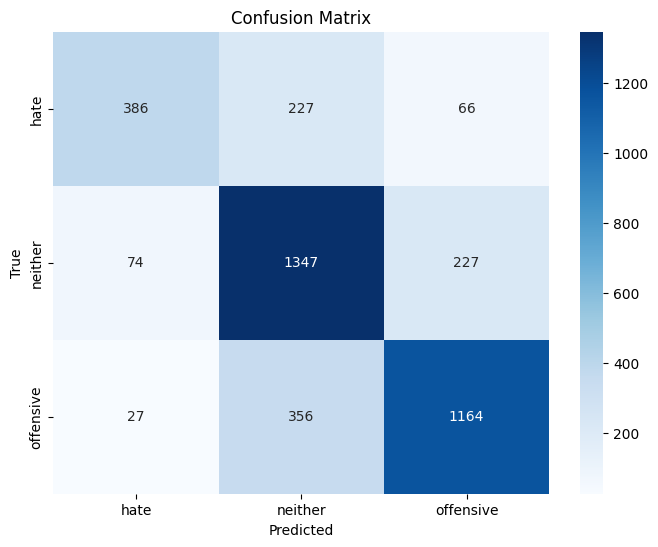

In [ ]:
# Classification report and confusion matrix
print("BiLSTM + GloVe Classification Report")
print(classification_report(y_test, y_pred_glove_class, target_names=label_encoder.classes_))

cm_glove = confusion_matrix(y_test, y_pred_glove_class)
plot_confusion_matrix(cm_glove, label_encoder.classes_)

# 5-Fold Cross-Validation for GloVe
f1_scores_glove = []
accuracies_glove = []
precisions_glove = []
recalls_glove = []


In [1]:
from google.colab import files
file=files.upload()

Saving final swahili hate dataset.csv to final swahili hate dataset.csv


In [2]:
from google.colab import files
file=files.upload()

Saving final code-switched hate dataset.csv to final code-switched hate dataset.csv
